# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    return (x**2)*numpy.sin(x)

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    return 2*x*(numpy.sin(x))+(2-x**2)*numpy.cos(x)-2


Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE
    return g(xmax)-g(xmin)

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [9]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
    dx=(xmax-xmin)/(2*N)
    sum=0
    z=0
    k=0
    for i in range(0, N):
        k += 2 * f(xmin + 2*i * dx)

    for j in range(0, N):
        z += 4 * f(xmin + dx + 2*(j) * dx)

    return ((dx)/3)*(f(xmin)+f(xmax)+k+z)


Make sure you have implemented Simpson's rule correctly:

In [10]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


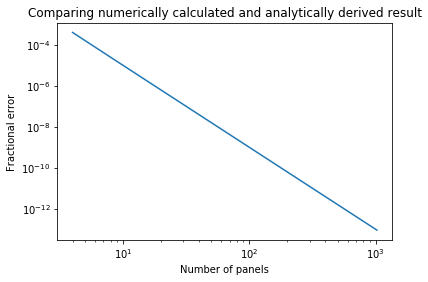

In [32]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
#y=[1,10**-1,10**-2,10**-3,10**-4,10**-5,10**-6,10**-7,10**-8]

z=[]

for i in panel_counts:
    difference=result_analytic-integrate_numeric(x0,x1,i)
    fractional_error=(difference)/(result_analytic)
    z.append(difference)
    
plt.xlabel("Number of panels")
plt.ylabel("Fractional error")
plt.title("Comparing numerically calculated and analytically derived result")
plt.loglog(panel_counts,z)

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels decreases the error proportional to N^(-4). However, when N is increased further than shown in the graph, it exhibits random behaviour in the errror. This is due to the values being stored to a finite value which means it is not infinitely accurate, so when the number of panels increases further than about 10^4, the random behaviour of error is seen. When the number of panels is too small, the simpsons rule is not very precise.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The error in the trapezium rule is proportional to N^(-2). This is true for much longer than the simpsons rule, however due to the simpsons rule being proportional to a higher order of N than the trapezium rule, the error in the trapezium rule is still larger than the error in the simpson rule until N is equal to roughly 10^(6)